Ejercicio de práctica

Usando un dataset diferente:

- Aplicar prueba de independencia entre dos variables categóricas (ej: edad y frecuencia de compra)

- Aplicar prueba de bondad de ajuste con alguna variable categórica.

- Concluir si hay relación y cómo eso podría afectar un futuro modelo de clasificación.

In [8]:
import pandas as pd
import numpy as np
from scipy.stats import chi2_contingency, chisquare
import seaborn as sns
import matplotlib.pyplot as plt

In [9]:
# 1. Carga tu base de datos desde el archivo CSV
file_path = "survey lung cancer.csv"
df = pd.read_csv(file_path)

In [10]:
# 2. Explora los datos
print(df.columns)

Index(['GENDER', 'AGE', 'SMOKING', 'YELLOW_FINGERS', 'ANXIETY',
       'PEER_PRESSURE', 'CHRONIC DISEASE', 'FATIGUE ', 'ALLERGY ', 'WHEEZING',
       'ALCOHOL CONSUMING', 'COUGHING', 'SHORTNESS OF BREATH',
       'SWALLOWING DIFFICULTY', 'CHEST PAIN', 'LUNG_CANCER'],
      dtype='object')


In [22]:
# 3.Aquí, por ejemplo, probaremos la relación entre 'Fumador' y 'Género'
tabla_contingencia = pd.crosstab(df['SMOKING'], df['LUNG_CANCER'])

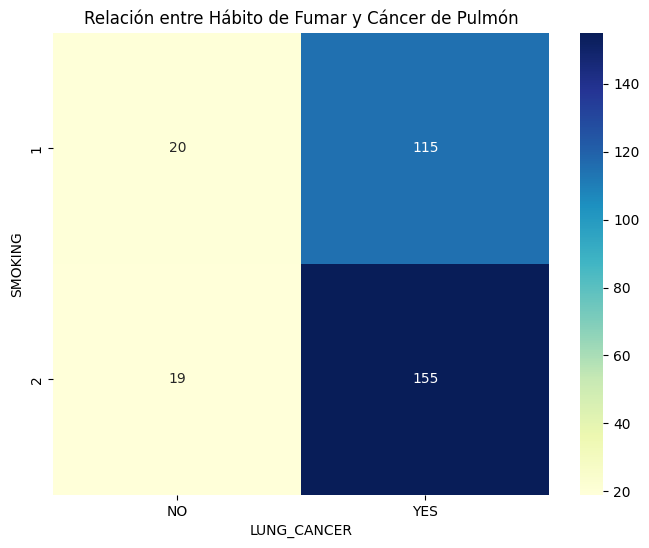

In [23]:
# 4. Visualiza la tabla de contingencia
plt.figure(figsize=(8, 6))
sns.heatmap(tabla_contingencia, annot=True, cmap='YlGnBu', fmt="d")
plt.title('Relación entre Hábito de Fumar y Cáncer de Pulmón')
plt.show()

In [24]:
# 5. Realiza la prueba de Chi² de independencia
chi2, p, dof, expected = chi2_contingency(tabla_contingencia)
print(f"Estadístico Chi²: {chi2:.4f}")
print(f"Valor p: {p:.4f}")

Estadístico Chi²: 0.7225
Valor p: 0.3953


In [25]:
# 6. Interpreta los resultados
if p < 0.05:
    print("Hay evidencia estadística de que el hábito de fumar está relacionado con el cáncer de pulmón.")
else:
    print("No hay evidencia suficiente para afirmar que el hábito de fumar depende del cáncer de pulmón.")

    print("\n" + "="*50 + "\n")
    


No hay evidencia suficiente para afirmar que el hábito de fumar depende del cáncer de pulmón.




In [26]:
# 7. Prueba de bondad de ajuste (Chi² tipo 3)
# Comprueba si la distribución de una variable (ej. 'GÉNERO') es como se esperaba.
# 2. Cuenta las observaciones de cada categoría (ej. Hombre, Mujer)
observado = df['LUNG_CANCER'].value_counts().sort_index()

In [27]:
# 8. Define la distribución esperada (asumimos una distribución uniforme: 50% Hombres, 50% Mujeres)
num_categorias = len(observado)
total_observaciones = len(df)
esperado = [total_observaciones / num_categorias] * num_categorias


In [28]:
# 9. Realiza la prueba de Chi-Cuadrado de bondad de ajuste
test_ajuste = chisquare(f_obs=observado, f_exp=esperado)
print("--- Prueba de bondad de ajuste (Chi² tipo 3) ---")
print(f"Chi²: {test_ajuste.statistic:.4f}")
print(f"Valor p: {test_ajuste.pvalue:.4f}")

--- Prueba de bondad de ajuste (Chi² tipo 3) ---
Chi²: 172.6893
Valor p: 0.0000


In [29]:
# 10. Interpreta los resultados
if test_ajuste.pvalue < 0.05:
    print("La distribución de cáncer observada difiere de lo que esperábamos (distribución uniforme).")
else:
    print("No hay diferencia significativa en la distribución de cáncer.")

La distribución de cáncer observada difiere de lo que esperábamos (distribución uniforme).


Conclusión a partir de los resultados

- Si el valor p es menor que 0.05:
  Esto significa que la relación entre las variables no es producto del azar. En este caso, el hábito de fumar y el cancer de pulmon son variables que están relacionadas.

- Si el valor p es mayor que 0.05:
  Esto significa que no hay suficiente evidencia estadística para afirmar que existe una relación entre las variables. Cualquier asociación observada en los datos podría ser por casualidad.

Impacto en un futuro modelo de clasificación

- Un modelo de clasificación predice una etiqueta (por ejemplo, si un paciente tiene cáncer de pulmón) basándose en las características del paciente (variables   como fumar, género, etc.). La relación entre estas variables afecta al modelo de la siguiente manera:

- Selección de Características: Si la prueba de hipótesis muestra que el hábito de fumar y el cancer de pulmon están relacionados, estas variables son       importantes para    el modelo. Un buen modelo de clasificación utilizará estas características para hacer predicciones más precisas.

- Precisión del Modelo: Usar variables que tienen una relación significativa con el resultado que quieres predecir (como el riesgo de cáncer de pulmón) aumentará la   precisión de tu modelo. Por el contrario, usar variables no relacionadas o que tienen una relación débil podría hacer que el modelo sea menos efectivo.